# Investigating Cardiovascular Deaths

The World Health Organization (WHO) estimates that 17.9 million people die from cardiovascular diseases (CVDs) every year. Let's investigate and see if we can determine the primary factors

In [1]:
# Import relevant packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

In [2]:
# read in data from csv
df = pd.read_csv('heart_disease_prediction.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
# Inspect dataset, no missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Min values of zero for RestingBP, Cholesterol are likely suspect

In [6]:
# Review Categorical data
cat_columns = df.select_dtypes(include='object').columns.to_list()
cat_columns.append('FastingBS')
cat_columns.append('HeartDisease')

cat_columns

['Sex',
 'ChestPainType',
 'RestingECG',
 'ExerciseAngina',
 'ST_Slope',
 'FastingBS',
 'HeartDisease']

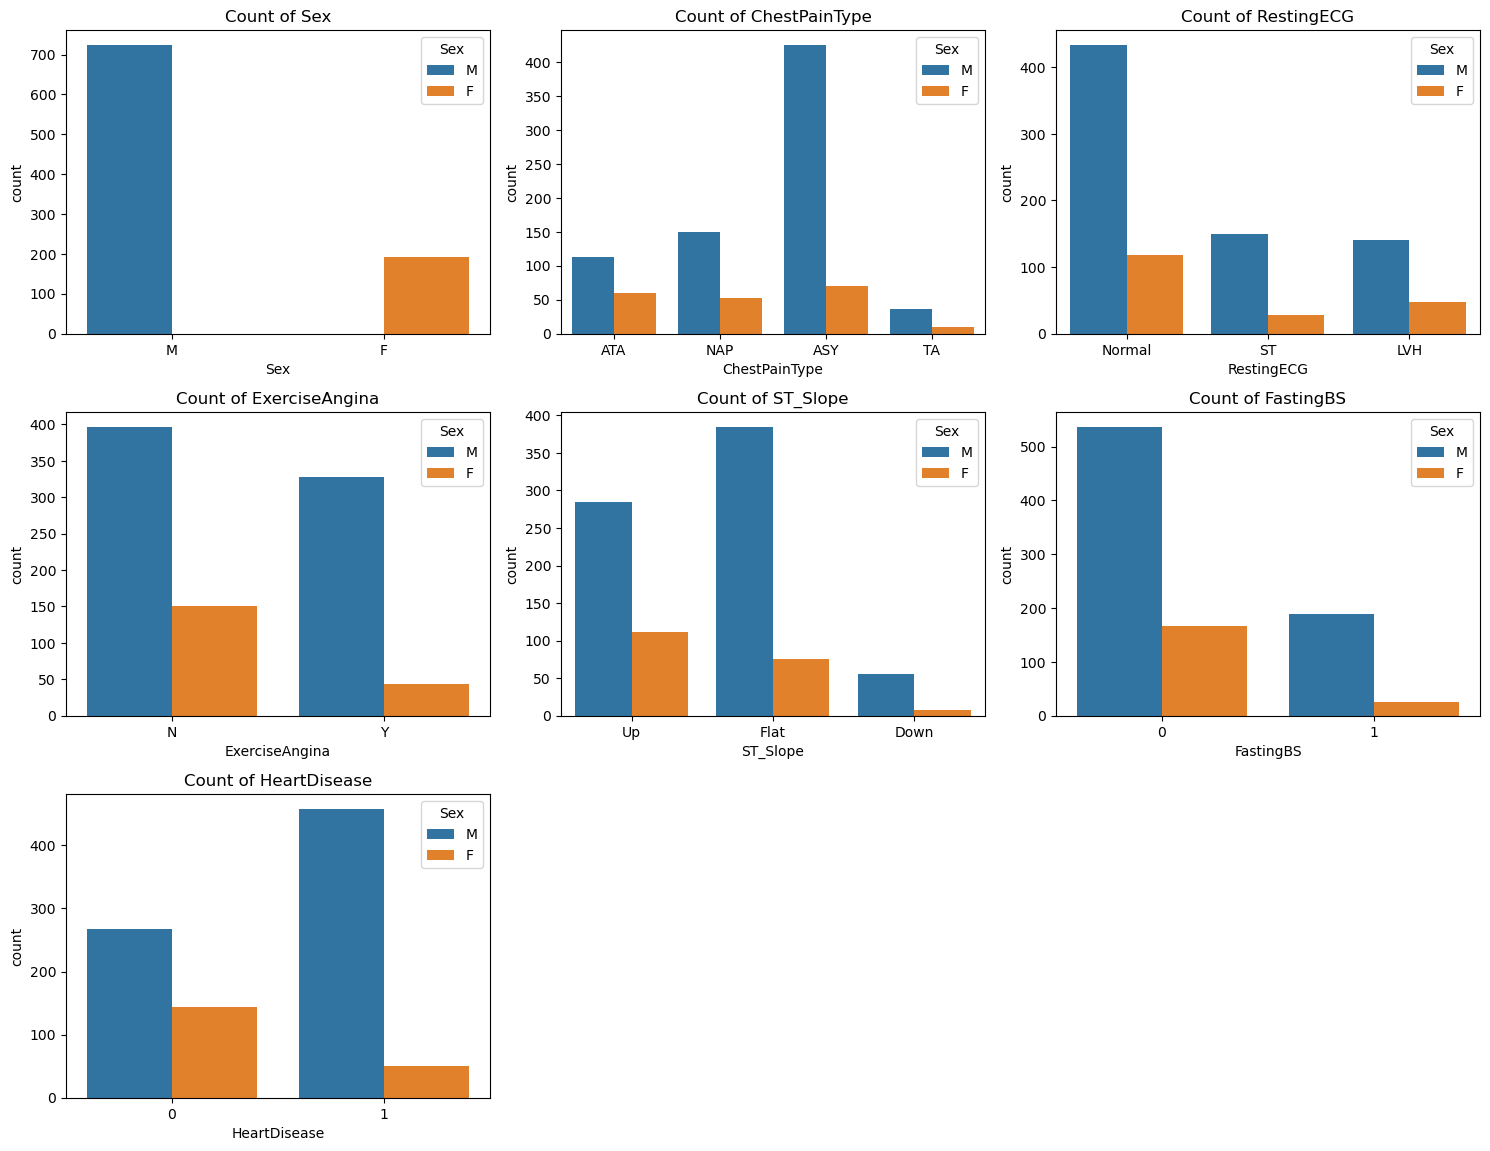

In [7]:
fig = plt.figure(figsize=[15,15])
    
for i, col in enumerate(cat_columns):
    ax = fig.add_subplot(4,3,i+1)
    ax = sns.countplot(data = df,x=col,hue='Sex')
    ax.set_xlabel(col)
    ax.set_title(f'Count of {col}')
plt.tight_layout()
plt.show()

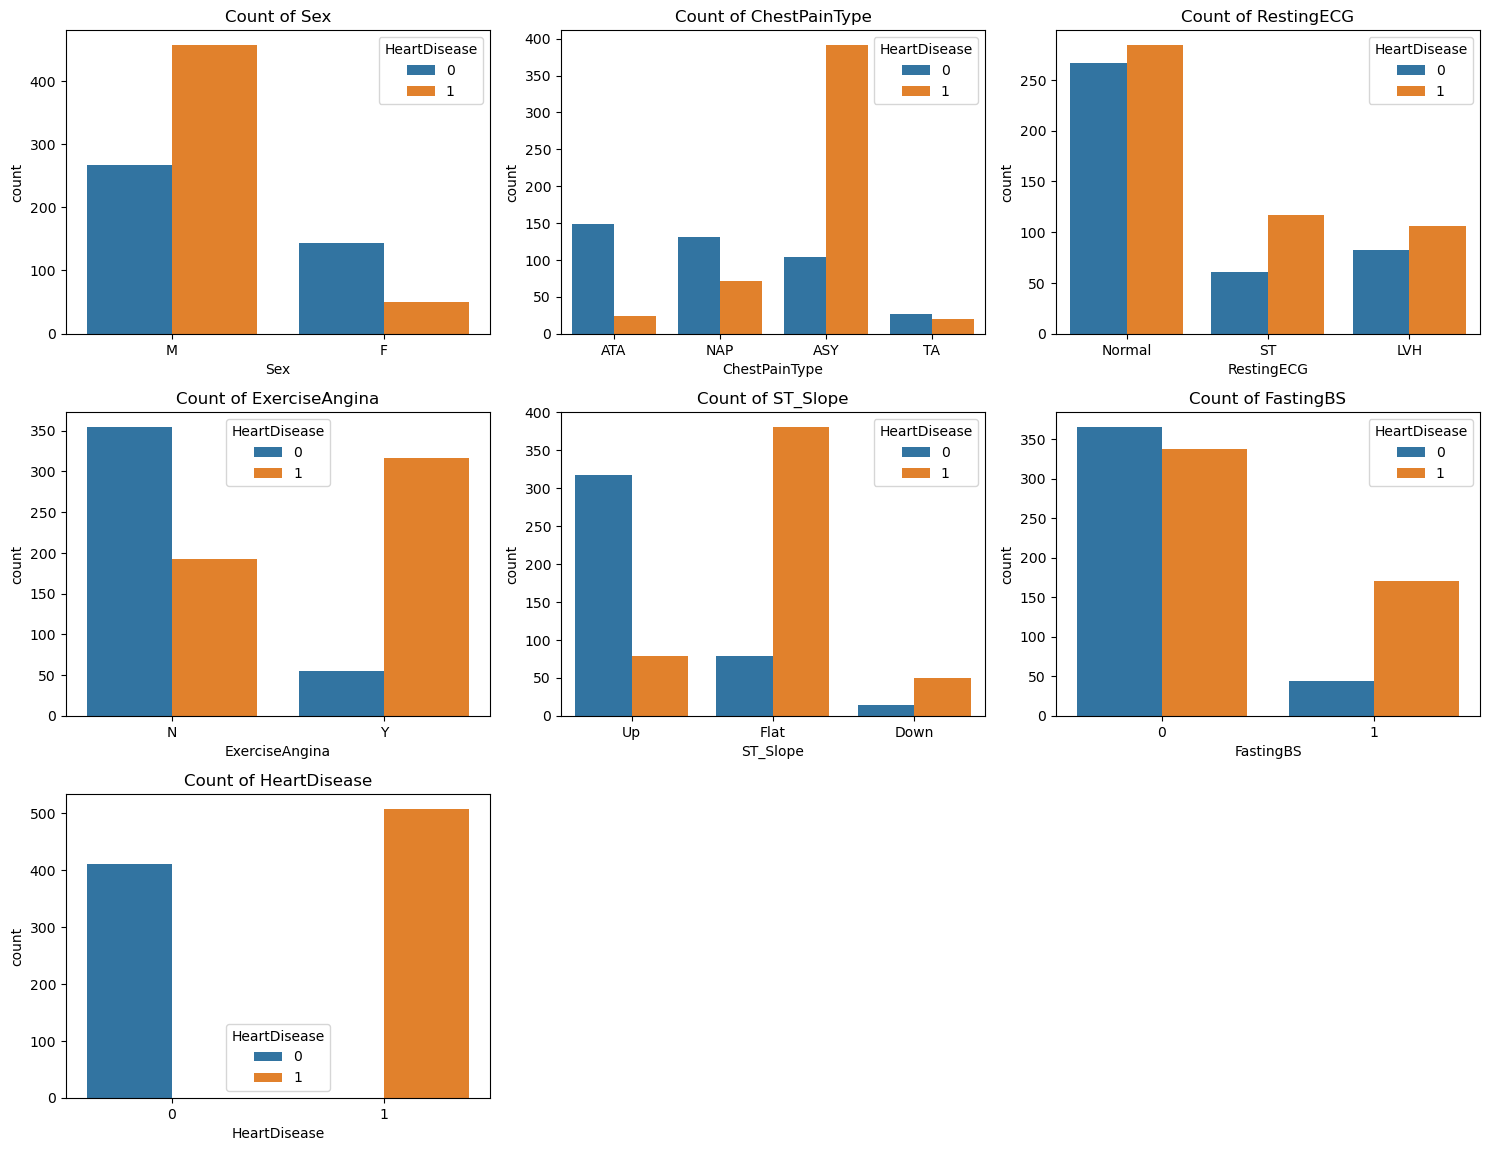

In [8]:
fig = plt.figure(figsize=[15,15])
    
for i, col in enumerate(cat_columns):
    ax = fig.add_subplot(4,3,i+1)
    ax = sns.countplot(data = df,x=col,hue='HeartDisease')
    ax.set_xlabel(col)
    ax.set_title(f'Count of {col}')
plt.tight_layout()
plt.show()

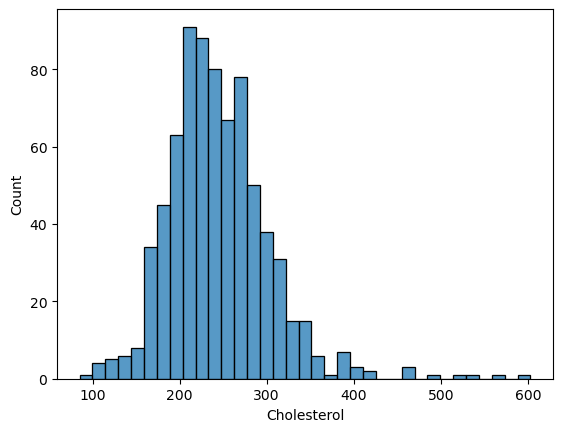

In [9]:
# cholesterol is right skewed
sns.histplot(data=df[df['Cholesterol']!=0],x='Cholesterol')
plt.show()

In [10]:
# view missing or zeroed data
# Will drop missing value for RestingBP since only one value
print((df['RestingBP']==0).sum())


# Will impute cholesterol with mean value since significant portion of dataset is missing
print((df['Cholesterol']==0).sum())

1
172


In [11]:
# impute mean value for missing cholesterol
df.loc[df['RestingBP']==0,'RestingBP'] = df['RestingBP'].median()
df.loc[df['Cholesterol']==0,'Cholesterol'] = df['Cholesterol'].median()

In [12]:
# Select features for model; categorical variables need to be dummy coded
cat_features = ['Sex','ChestPainType','ST_Slope','ExerciseAngina','RestingECG']

In [33]:
df_cat = pd.get_dummies(data = df.copy(), columns= cat_features, drop_first=True).copy()
df_cat.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ST_Slope_Flat,ST_Slope_Up,ExerciseAngina_Y,RestingECG_Normal,RestingECG_ST
0,40,140,289,0,172,0.0,0,1,1,0,0,0,1,0,1,0
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,0,1,0,1,0


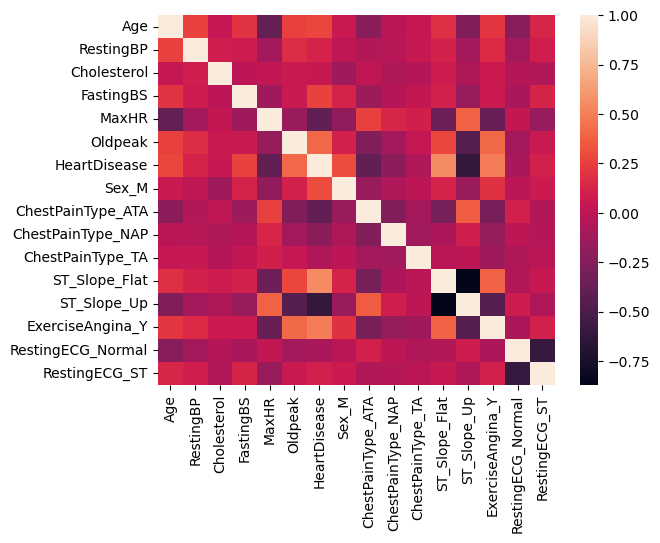

In [53]:
# look at correlation coefficients
pearson_r = df_cat.corr()
sns.heatmap(pearson_r)
plt.show()

In [50]:
# Create dataframe of pearson and r2 coef
corr_df = pd.DataFrame(zip(pearson_r['HeartDisease'], pearson_r['HeartDisease']**2), 
             columns=['pearson','r2'], index=pearson_r.index) \
            .drop(['HeartDisease']) \
            .sort_values(['r2'], ascending=False)
corr_df

,pearson,r2
ST_Slope_Up,-0.622164,0.387088
ST_Slope_Flat,0.554134,0.307064
ExerciseAngina_Y,0.494282,0.244315
Oldpeak,0.403951,0.163176
ChestPainType_ATA,-0.401924,0.161543
MaxHR,-0.400421,0.160337
Sex_M,0.305445,0.093297
Age,0.282039,0.079546
FastingBS,0.267291,0.071445
ChestPainType_NAP,-0.212964,0.045354


# Model training

In [19]:
# Split up data into train and test sets

from sklearn.model_selection import train_test_split

X = df_cat.drop(['HeartDisease'],axis=1)
y = df_cat['HeartDisease']

# Split up into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

In [20]:
# Feature selection from pearson and r2 from corr dataframe
features = ['Oldpeak','Sex_M','ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up']

In [21]:
from sklearn.neighbors import KNeighborsClassifier

acc_list = {}

for f in features:
    knn = KNeighborsClassifier()
    knn.fit(X_train[[f]], y_train)
    acc = knn.score(X_val[[f]], y_val)
    acc_list[f] = (acc*100).round(2)

print(acc_list)

{'Oldpeak': 61.41, 'Sex_M': 68.48, 'ExerciseAngina_Y': 75.54, 'ST_Slope_Flat': 78.8, 'ST_Slope_Up': 59.78}


In [22]:
X_train = X_train[features]
X_val = X_val[features]

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

In [24]:
acc_list2 = {}

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
acc = knn.score(X_val.values, y_val)
acc

0.8532608695652174

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [26]:
X_train_scaled = scaler.fit(X_train)

In [27]:
param_dict = {
    'n_neighbors':range(1,25),
    'metric':['minkowski','euclidean']
}

In [28]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(knn, param_dict,scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean'],
                         'n_neighbors': range(1, 25)},
             scoring='accuracy')

In [29]:
grid.best_params_

{'metric': 'minkowski', 'n_neighbors': 19}

In [30]:
grid.best_score_

0.6893952101388501

In [31]:
X_test_scaled = scaler.transform(X_test)

In [32]:
grid.best_estimator_.score(X_test_scaled, y_test.values)

C:\Users\Afran\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.5978260869565217